In [1]:
import matplotlib.pylab as plt
import pickle
import numpy as np
import os

In [2]:
plt.style.use('default')
plt.rc('figure', figsize = (15,8))
plt.rc('axes', labelsize=24)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

In [6]:
import pandas as pd

In [11]:
result = pd.read_csv('output2x2-100000mcs.dat', header=0, sep='\s+')

In [12]:
result

,T,EMEAN,E2MEAN,CV,MMEAN,Mmean,|M|mean,siflips,noflips
0,5.00000,74863.000,7.484100e+09,751.820000,0.04342,2.4959,37628,62372,NaN
1,4.91500,73676.000,7.232600e+09,746.960000,0.01294,2.5197,36801,63199,NaN
2,4.82990,71676.000,6.870200e+09,742.750000,0.07018,2.5400,35932,64068,NaN
3,4.74490,70858.000,6.684300e+09,738.870000,0.05102,2.5490,35235,64765,NaN
4,4.65990,69278.000,6.373200e+09,724.780000,0.02446,2.5826,34489,65511,NaN
5,4.57480,66907.000,5.955800e+09,706.780000,0.01738,2.6207,33352,66648,NaN
6,4.48980,65879.000,5.796200e+09,722.370000,-0.02400,2.6180,32916,67084,NaN
7,4.40480,63837.000,5.447100e+09,707.100000,-0.01076,2.6447,31920,68080,NaN
8,4.31970,62092.000,5.137300e+09,686.970000,-0.11204,2.6713,31063,68937,NaN
9,4.23470,60395.000,4.842000e+09,666.100000,0.03182,2.7168,30091,69909,NaN


In [50]:
input_pickle = '10x10_100000-steps.pkl'
if os.path.exists(input_pickle):# and os.path.getmtime('ising.py') < os.path.getmtime(input_pickle):
    pass
else:
    os.popen('python ising.py')
with open(input_pickle, 'rb') as f:
    KT     = pickle.load( f)
    changes= pickle.load( f)
    S      = pickle.load( f)
    Mhist  = pickle.load( f)
    Ehist  = pickle.load( f)
    VARhist= pickle.load( f)
    acumM  = pickle.load( f)
    acumE  = pickle.load( f)
    acumE2 = pickle.load( f)
    acumVAR= pickle.load( f)

In [51]:
S.shape

(20, 10, 10)

In [52]:
changes.shape

(100000, 2, 20)

In [53]:
Norm = changes.shape[0]*S.shape[1]*S.shape[2]

In [54]:
Norm

10000000

# Dinámica

In [55]:
Mhist.shape

(20, 20001)

In [56]:
changes.shape

(100000, 2, 20)

Text(0, 0.5, '$M $')

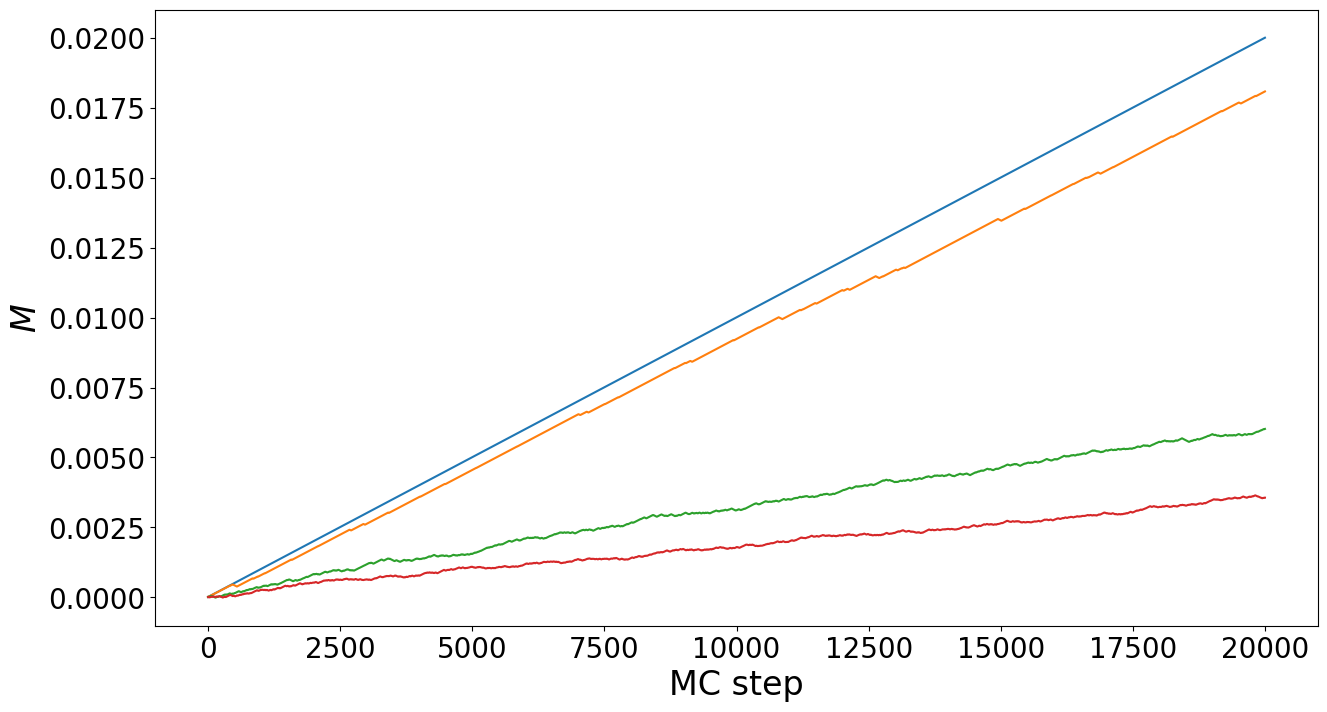

In [57]:
#plt.plot(Mhist[0]/Norm)
#plt.plot(Mhist[1]/Norm)
#plt.plot(Mhist[2]/Norm)
#plt.plot(Mhist[3]/Norm)
#plt.plot(Mhist[4]/Norm)
plt.plot(Mhist[-1]/Norm)
plt.plot(Mhist[-2]/Norm)
plt.plot(Mhist[-3]/Norm)
plt.plot(Mhist[-4]/Norm)
plt.xlabel('MC step')
plt.ylabel('$M $')

In [58]:
KT

array([4.2       , 3.31009462, 2.81615503, 2.54199519, 2.38982351,
       2.30536103, 2.25848035, 2.23245936, 2.21801648, 2.21      ,
       2.19      , 2.18198352, 2.16754064, 2.14151965, 2.09463897,
       2.01017649, 1.85800481, 1.58384497, 1.08990538, 0.2       ])

In [59]:
for i, t in enumerate(KT):
    print (t)

4.2
3.310094615569623
2.8161550277583345
2.5419951893353394
2.389823509115937
2.3053610276890666
2.2584803547642576
2.232459363470202
2.2180164823065445
2.21
2.1900000000000004
2.181983517693456
2.1675406365297984
2.141519645235743
2.0946389723109338
2.010176490884063
1.858004810664661
1.5838449722416659
1.0899053844303774
0.20000000000000018


# Promedios

In [60]:
((Ehist[10]**2)/Norm**2).sum()

0.03681449051513

In [61]:
(Ehist[10].sum()/Norm)**2/KT[10]**2

108.89322654954773

In [62]:
((Ehist[10].sum()/Norm)**2 - ((Ehist[10]**2)/Norm**2).sum())/KT[10]**2


108.88555062733695

In [63]:
((Ehist[1].sum()/Norm)**2 - ((Ehist[1]**2)/Norm**2).sum())/KT[1]**2


590.1025611423904

In [64]:
Mprom = []
for i, t in enumerate(KT):
    Mprom.append(np.abs(Mhist[i]).sum()/Norm)
    

Text(0.5, 0, 'KT')

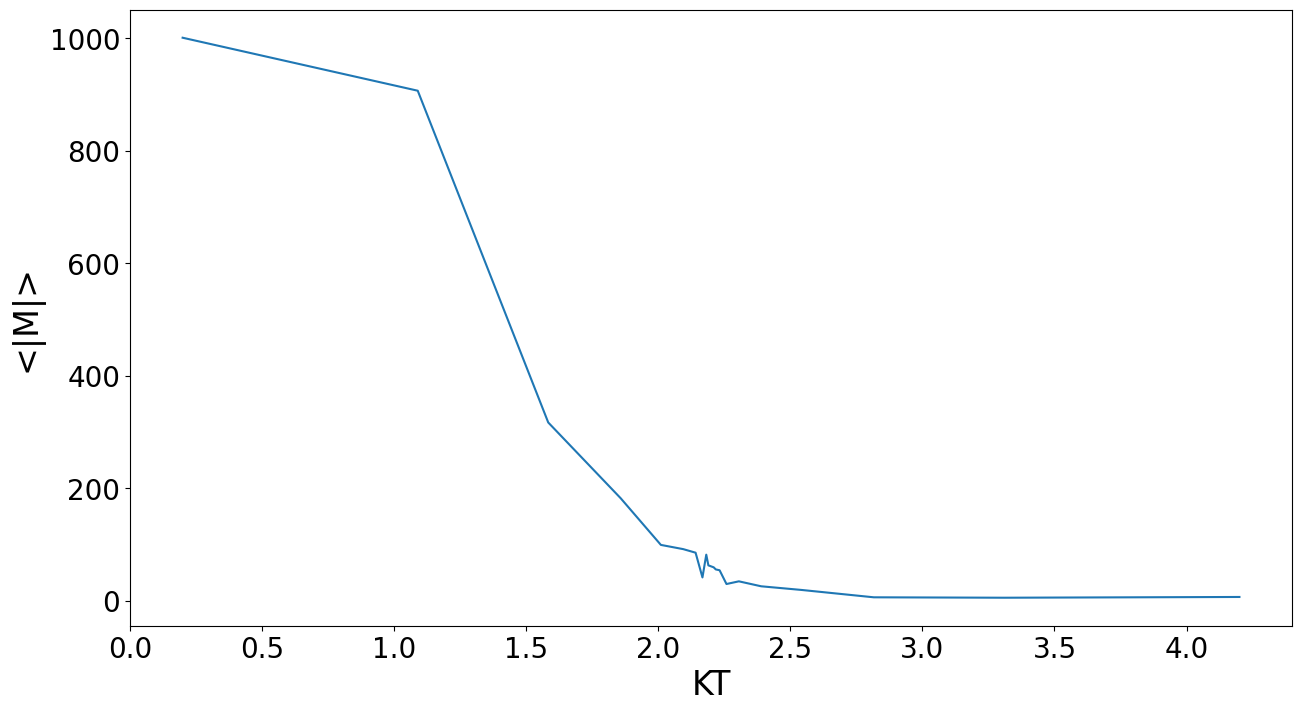

In [65]:
fig, ax = plt.subplots()
ax.plot(KT, acumM/Norm)
# ax.plot(KT, Mprom)
ax.set_ylabel('<|M|>')
ax.set_xlabel('KT')

In [66]:
_VAR = []
for i, t in enumerate(KT):
    _VAR.append( ((Ehist[i]**2).sum() - Ehist[i].sum()**2)/Norm**2/t**2)

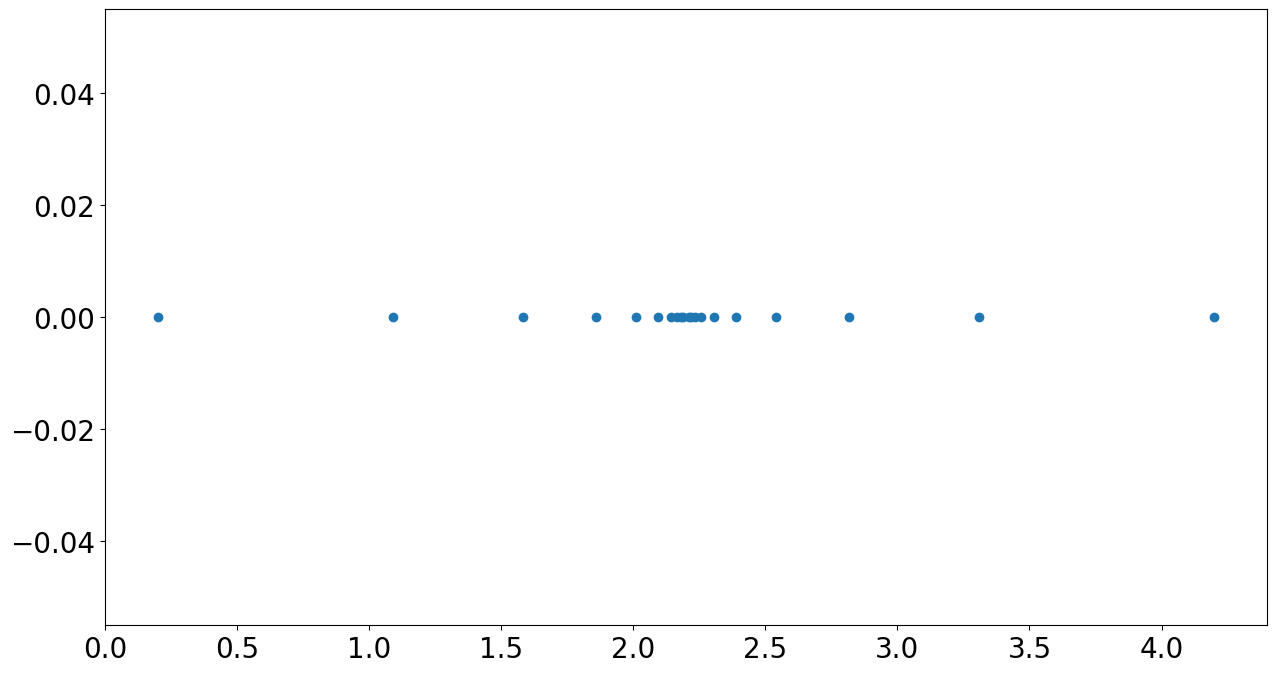

In [39]:
plt.plot(KT,acumVAR/KT/Norm**2,'o')

In [40]:
acumVAR

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

# Estados temralizados

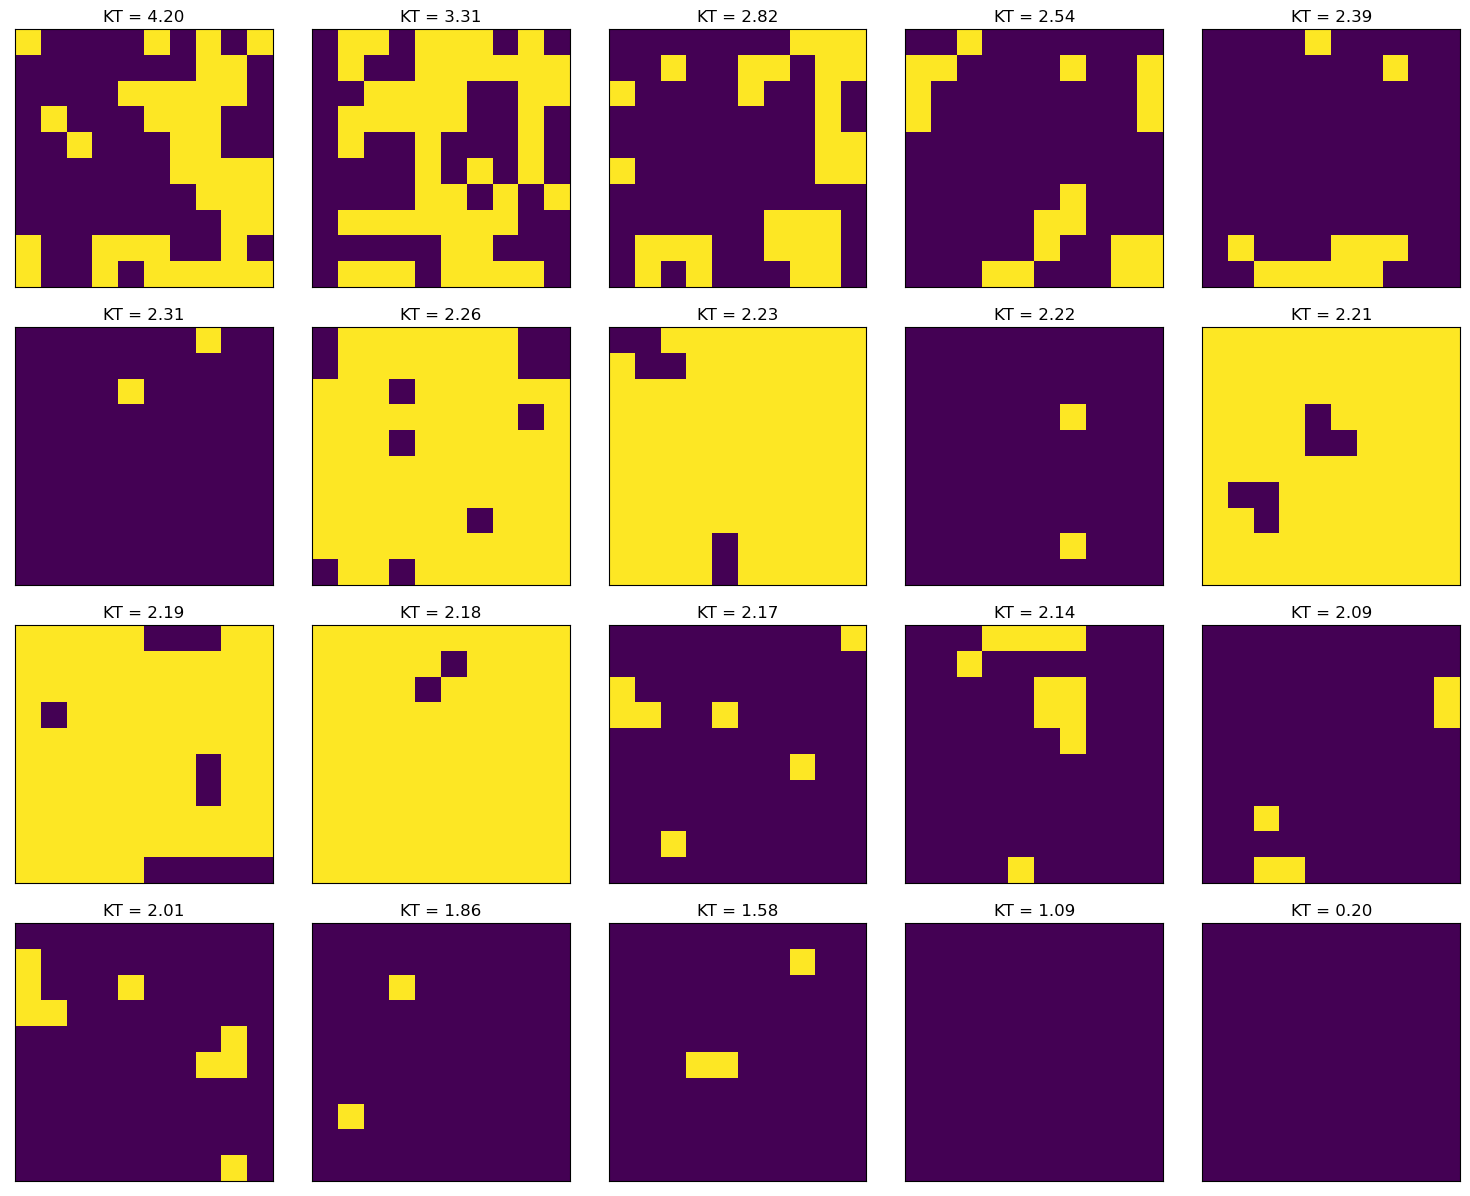

In [41]:
fig = plt.figure(figsize=(15,15))
for i, s in enumerate(S):
    ax = fig.add_subplot(int(S.shape[0]/5)+1, 5, i+1 )
    ax.set_yticks([])
    ax.set_xticks([])
    ax.imshow(s)
    ax.set_title('KT = {:.2f}'.format(KT[i]))
fig.tight_layout()

# read a file

In [4]:
import pandas as pd

In [5]:
np.loadtxt('output4x4-1000000mcs.dat')

/tmp/ipykernel_8776/1261128087.py:1: UserWarning: loadtxt: Empty input file: "output4x4-1000000mcs.dat"
  np.loadtxt('output4x4-1000000mcs.dat')


array([], dtype=float64)